# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Carlos Adrián Palmieri Álvarez

- ID: A01635776

- My carreer: Ingeniería en Transformación Digital de Negocios


# Importing libraries

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [256]:
# Loading the data
df = pd.read_csv('A01635776_X.csv')
df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7
0,0,0.548623,-1.910948,-11.901292,-7.025475,-0.070431,-10.047915,5.872205
1,1,-6.924306,-2.564829,0.361805,-5.903484,-10.632755,-4.675623,10.945084
2,2,1.382130,-2.710636,-9.077441,-8.959650,3.534510,-11.255706,5.180216
3,3,-12.704677,-4.005811,-2.562207,-1.943606,-3.988797,-5.425961,5.346951
4,4,6.208398,-9.952099,12.920059,4.041722,0.064020,-4.424441,-9.213992
...,...,...,...,...,...,...,...,...
729,729,-12.328680,-1.128888,0.733825,-1.816734,-7.430787,-7.796101,9.178038
730,730,5.378499,-9.587803,9.429066,0.221106,-0.920905,-4.140554,-7.810242
731,731,-8.457699,-3.744443,-2.564437,-1.168657,-10.870866,-8.904250,8.642211
732,732,-2.369323,1.467448,-7.115152,-8.116721,3.235291,-7.706698,3.840647


## b) Data managment


Print the first 7 rows

In [257]:
df.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7
0,0,0.548623,-1.910948,-11.901292,-7.025475,-0.070431,-10.047915,5.872205
1,1,-6.924306,-2.564829,0.361805,-5.903484,-10.632755,-4.675623,10.945084
2,2,1.382130,-2.710636,-9.077441,-8.959650,3.534510,-11.255706,5.180216
3,3,-12.704677,-4.005811,-2.562207,-1.943606,-3.988797,-5.425961,5.346951
4,4,6.208398,-9.952099,12.920059,4.041722,0.064020,-4.424441,-9.213992
5,5,7.203249,-8.335716,10.476066,-0.994656,-1.671413,-2.629867,-10.512231
6,6,0.449742,0.679754,-6.593076,-9.087811,2.412706,-5.674238,4.873742


Print the last 4 rows

In [258]:
df.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7
730,730,5.378499,-9.587803,9.429066,0.221106,-0.920905,-4.140554,-7.810242
731,731,-8.457699,-3.744443,-2.564437,-1.168657,-10.870866,-8.904250,8.642211
732,732,-2.369323,1.467448,-7.115152,-8.116721,3.235291,-7.706698,3.840647
733,733,0.130342,-3.637898,-8.984359,5.029322,-5.300400,-2.451634,2.920059


How many rows and columns are in your data?

Use the `shape` method


In [259]:
df.shape

(734, 8)

Print the name of all columns

Use the `columns` method

In [260]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [261]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
dtype: object

What is the meaning of rows and columns?

Your responses here

Al momento de imprimir los 7 primeros registros ya nos podemos dar cuenta de la estructura de los datos proporcionados, podemos ver por medio de métodos como shape o columns o dtypes en donde encontramos que la el data frame contiene 8 columnas y 734 registros los cuales contienen valores float64. 

El nombre de las columnas son: 'Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7'

Print a statistical summary of your columns


In [262]:
# Imprimiendo el resumen estadístico
df.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7
count,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000,734.000000
mean,366.500000,-1.603780,-2.812984,-2.169828,-2.252833,-2.940158,-6.624729,0.642012
std,212.031837,5.957704,3.715351,7.607248,4.962315,4.122940,2.645089,6.544110
min,0.000000,-15.622486,-13.384193,-13.885669,-16.348820,-13.508118,-14.723573,-13.907050
25%,183.250000,-6.182057,-4.996335,-8.574066,-6.066077,-6.092098,-8.394199,-4.938315
50%,366.500000,-1.234326,-1.833080,-4.048616,-1.090127,-3.191857,-6.532366,2.551133
75%,549.750000,2.975344,-0.215195,4.892075,1.512901,0.313313,-4.779018,5.985739
max,733.000000,11.008032,4.238374,13.617975,7.468611,7.679681,1.214834,11.869864


1. What is the minumum and maximum values of each variable:
Unnamed: 0. El valor mínimo es: 0 y el valor máximo es 733 debido a que al parecer es un id de los datos.
x1: El valor mínimo es: -15.622486	 y el valor máximo es 11.008032
x2: El valor mínimo es: -13.384193 y el valor máximo es 4.238374
x3: El valor mínimo es: -13.885669 y el valor máximo es 13.617975
x4: El valor mínimo es: -16.348820 y el valor máximo es 7.468611
x5: El valor mínimo es: -13.508118 y el valor máximo es 7.679681
x6: El valor mínimo es: -14.723573 y el valor máximo es 1.214834
x7: El valor mínimo es: -13.907050 y el valor máximo es 11.869864

2. What is the mean and standar deviation of each variable:
std	212.031837	5.957704	3.715351	7.607248	4.962315	4.122940	2.645089	6.544110
para x1,x2,x3,x4,x5,x6,x7 respectivamente


3. What the 25%, 50% and 75% represent?:
El 25% representa el primer cuartil de los datos
El 50% representa la mediana de los datos
El 75% representa el tercer cuartil de los datos


Rename the columns using the same name with capital letters

In [263]:
# Renombrando las columnas
df.rename(columns={'Unnamed: 0':'UNNAMED: 0', 'x1':'X1', 'x2':'X2', 'x3':'X3', 'x4':'X4', 'x5':'X5', 'x6':'X6', 'x7':'X7'}, inplace=True)
df

,UNNAMED: 0,X1,X2,X3,X4,X5,X6,X7
0,0,0.548623,-1.910948,-11.901292,-7.025475,-0.070431,-10.047915,5.872205
1,1,-6.924306,-2.564829,0.361805,-5.903484,-10.632755,-4.675623,10.945084
2,2,1.382130,-2.710636,-9.077441,-8.959650,3.534510,-11.255706,5.180216
3,3,-12.704677,-4.005811,-2.562207,-1.943606,-3.988797,-5.425961,5.346951
4,4,6.208398,-9.952099,12.920059,4.041722,0.064020,-4.424441,-9.213992
...,...,...,...,...,...,...,...,...
729,729,-12.328680,-1.128888,0.733825,-1.816734,-7.430787,-7.796101,9.178038
730,730,5.378499,-9.587803,9.429066,0.221106,-0.920905,-4.140554,-7.810242
731,731,-8.457699,-3.744443,-2.564437,-1.168657,-10.870866,-8.904250,8.642211
732,732,-2.369323,1.467448,-7.115152,-8.116721,3.235291,-7.706698,3.840647


Rename the columns to their original names

In [264]:
# Renombrando de regreso las columnas
df.rename(columns={'UNNAMED: 0':'Unnamed: 0', 'X1':'x1', 'X2':'x2', 'X3':'x3', 'X4':'x4', 'X5':'x5', 'X6':'x6', 'X7':'x7'}, inplace=True)
df

,Unnamed: 0,x1,x2,x3,x4,x5,x6,x7
0,0,0.548623,-1.910948,-11.901292,-7.025475,-0.070431,-10.047915,5.872205
1,1,-6.924306,-2.564829,0.361805,-5.903484,-10.632755,-4.675623,10.945084
2,2,1.382130,-2.710636,-9.077441,-8.959650,3.534510,-11.255706,5.180216
3,3,-12.704677,-4.005811,-2.562207,-1.943606,-3.988797,-5.425961,5.346951
4,4,6.208398,-9.952099,12.920059,4.041722,0.064020,-4.424441,-9.213992
...,...,...,...,...,...,...,...,...
729,729,-12.328680,-1.128888,0.733825,-1.816734,-7.430787,-7.796101,9.178038
730,730,5.378499,-9.587803,9.429066,0.221106,-0.920905,-4.140554,-7.810242
731,731,-8.457699,-3.744443,-2.564437,-1.168657,-10.870866,-8.904250,8.642211
732,732,-2.369323,1.467448,-7.115152,-8.116721,3.235291,-7.706698,3.840647


Use two different alternatives to get one of the columns

In [265]:
# Haciendo el primer método para obtener una columna
print(df['x1'])

# Haciendo el segundo método para obtener una columna
print("\n\n",df.x1)

0       0.548623
1      -6.924306
2       1.382130
3     -12.704677
4       6.208398
         ...    
729   -12.328680
730     5.378499
731    -8.457699
732    -2.369323
733     0.130342
Name: x1, Length: 734, dtype: float64


 0       0.548623
1      -6.924306
2       1.382130
3     -12.704677
4       6.208398
         ...    
729   -12.328680
730     5.378499
731    -8.457699
732    -2.369323
733     0.130342
Name: x1, Length: 734, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [266]:
# Obteniendo la información de la columna dos y tres del registro 62 a 72
print(df.loc[62:72, ['x2', 'x3']])
print("\n\n")
print(df.iloc[62:73, 2:4])

          x2         x3
62 -4.269254  -0.704881
63 -0.015347  -0.149120
64 -0.864376 -10.229338
65 -0.241511  -0.048419
66 -0.442671 -11.454238
67  1.805561 -10.897602
68 -2.599482  -8.584394
69 -5.051890  10.002827
70  1.467814  -8.533537
71  0.645005   0.901337
72 -4.769306   7.735971



          x2         x3
62 -4.269254  -0.704881
63 -0.015347  -0.149120
64 -0.864376 -10.229338
65 -0.241511  -0.048419
66 -0.442671 -11.454238
67  1.805561 -10.897602
68 -2.599482  -8.584394
69 -5.051890  10.002827
70  1.467814  -8.533537
71  0.645005   0.901337
72 -4.769306   7.735971


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [267]:
second_third = df.iloc[:, 2:4]

# Verificando valores no nulos de las columnas
num_no_nulos = second_third.notnull().sum()
print(num_no_nulos)

print("\n\n")

# Verificando cantidad de registros
num_registros = second_third.count()
print(num_registros)

x2    734
x3    734
dtype: int64



x2    734
x3    734
dtype: int64


Discard the last column


In [268]:
# Descartamos la ultima columna del df
df.drop(df.columns[7], axis=1, inplace=True)
df

,Unnamed: 0,x1,x2,x3,x4,x5,x6
0,0,0.548623,-1.910948,-11.901292,-7.025475,-0.070431,-10.047915
1,1,-6.924306,-2.564829,0.361805,-5.903484,-10.632755,-4.675623
2,2,1.382130,-2.710636,-9.077441,-8.959650,3.534510,-11.255706
3,3,-12.704677,-4.005811,-2.562207,-1.943606,-3.988797,-5.425961
4,4,6.208398,-9.952099,12.920059,4.041722,0.064020,-4.424441
...,...,...,...,...,...,...,...
729,729,-12.328680,-1.128888,0.733825,-1.816734,-7.430787,-7.796101
730,730,5.378499,-9.587803,9.429066,0.221106,-0.920905,-4.140554
731,731,-8.457699,-3.744443,-2.564437,-1.168657,-10.870866,-8.904250
732,732,-2.369323,1.467448,-7.115152,-8.116721,3.235291,-7.706698


### Questions

Based on the previos results, provide a full description of yout dataset

Your response:
En el dataset podemos encontrar una columna con el respectivo id de cada registro, también, podemos encontrar 7 columnas las cuales tienen valores numéricos flotantes pero los nombres las columnas no tienen título.




## c) Data visualization

Plot in the histogram of one of the variables

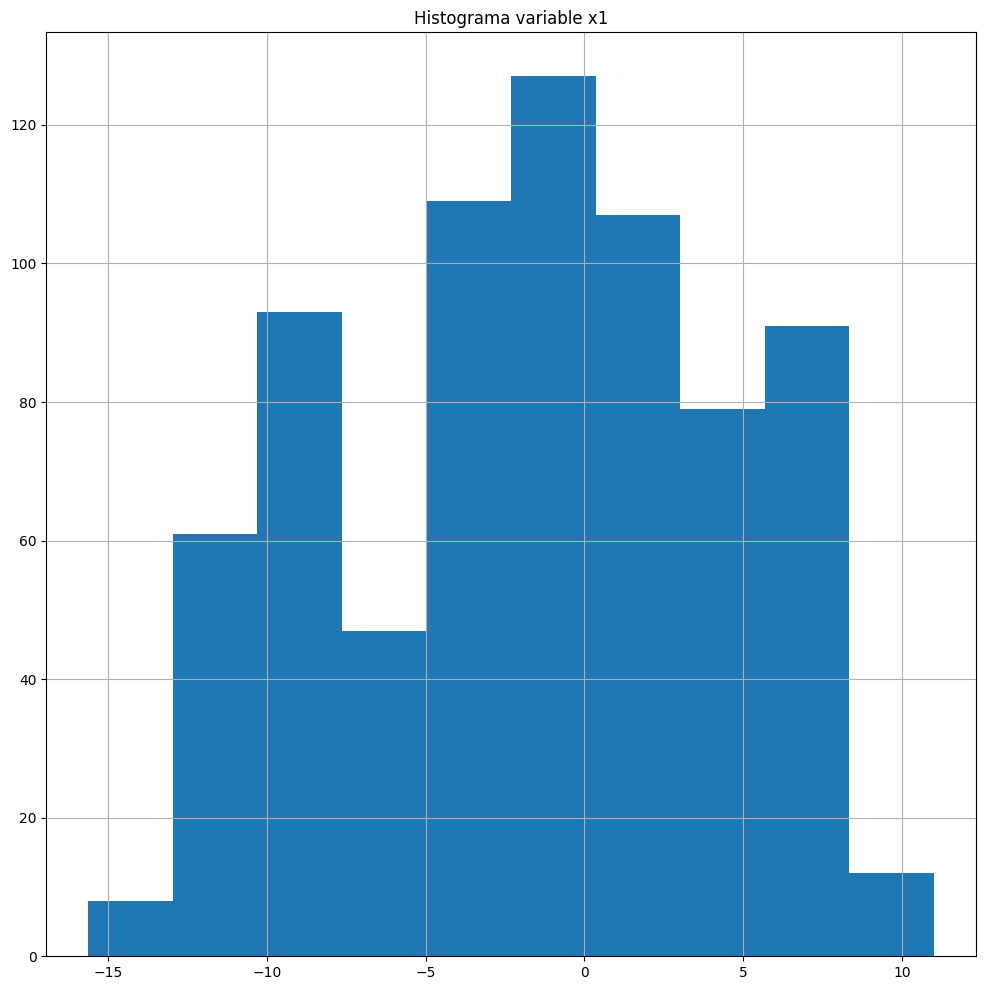

In [269]:
# Histograma the una variable
df['x1'].hist(figsize=(12,12))
plt.title('Histograma variable x1')
plt.show()

Plot in the same figure the histogram of two variables



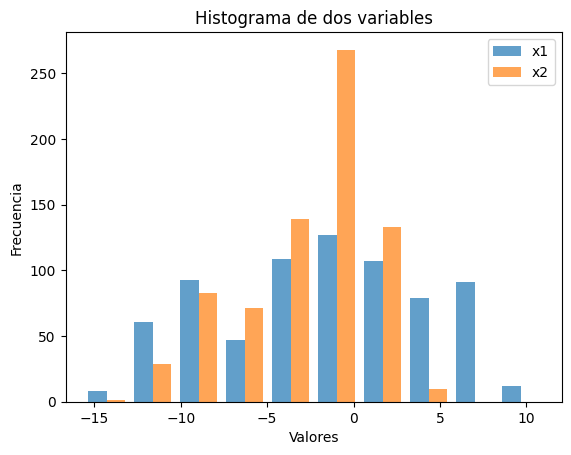

In [270]:
# Histograma the dos variable
plt.hist([df['x1'], df['x2']], bins=10, label=['x1', 'x2'], alpha=0.7)
plt.legend(loc='best')
plt.title('Histograma de dos variables')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Por el histograma podemos ver que antes del 0 existen muchos registros en la columna x2 los demás valores están distribuidos en los demás.

De la x1 se pueden ver que están más distribuidos a lo largo de los valores, desde el mínimo hasta el máximo.

Plot the boxplot of one of the variables

C:\Users\palmi\AppData\Local\Temp\ipykernel_27212\2302637415.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df['x1'], labels=['x1'])


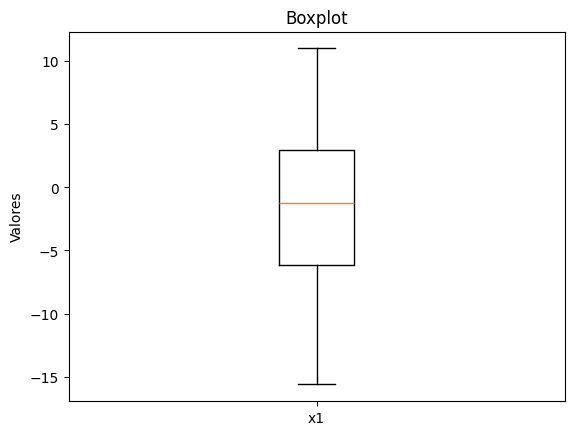

In [271]:
# Generando boxplot para la variable
plt.boxplot(df['x1'], labels=['x1'])
plt.title('Boxplot')
plt.ylabel('Valores')
plt.show()

Plot in the same figure the boxplot of two variables

C:\Users\palmi\AppData\Local\Temp\ipykernel_27212\3045890633.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['x3'], df['x4']], labels=['x3','x4'])


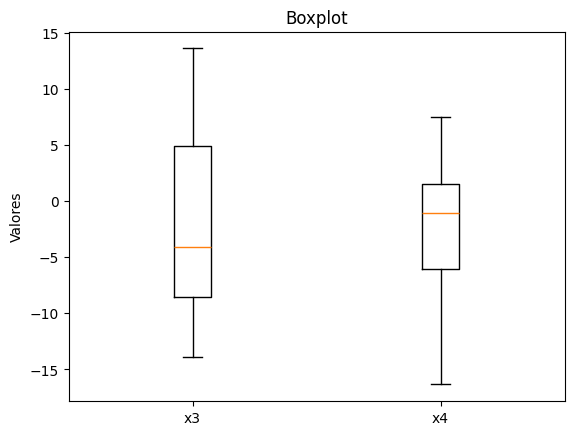

In [272]:
# Crear un boxplot
plt.boxplot([df['x3'], df['x4']], labels=['x3','x4'])
plt.title('Boxplot')
plt.ylabel('Valores')
plt.show()

Based on these plots, provide a description of your data:

Your response here:
Podemos ver que la mdia ene estas dos últimas variables están entre -5 y 0 y también modemos ver que x3 tiene una mayor dispersión y su mediana siendo más cercanos a los valores negativos. La variable x4 tiene una distribución más centrada en valores positivos y menos dispersa en comparación con x3.

Plot the scatter plot between all pair of variables

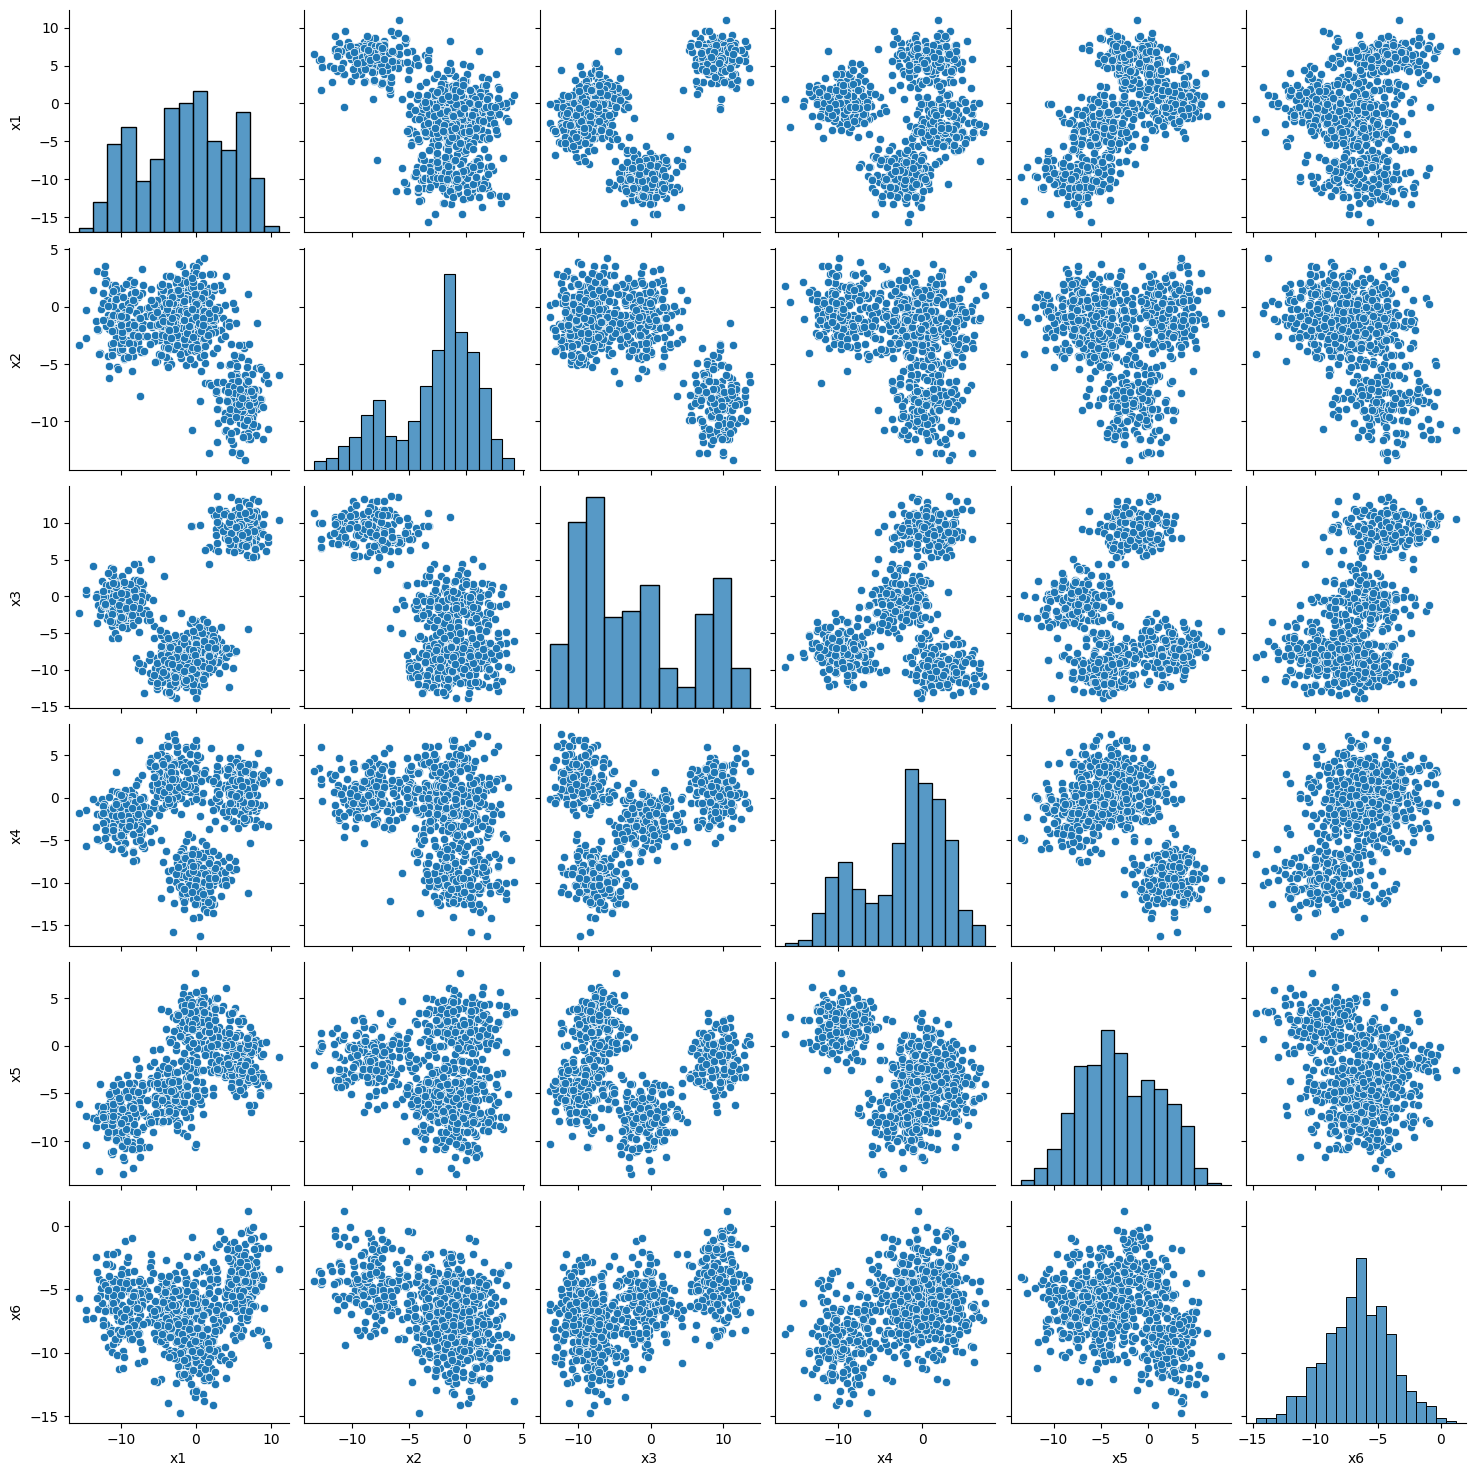

In [273]:
sns.pairplot(df, vars=["x1","x2","x3",'x4','x5','x6'])
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response:
Podemos observar en el scatterplot una diagonal en donde se presentan los histogramas. Los histogramas muestran algunas distribuciones CASI normales y podemos encontrar también, algunas distribuciones multimodales y distribuciones sesgadas. Y también podemos observar algunos patrones de agrupamiento como lo es la variables x1 con x4,aquí podemos observar algunos agrupamientos. 



## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [274]:
km = KMeans(n_clusters=4, random_state=0)

yp = km.fit_predict(df[['x1','x4']])
yp

array([0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 3, 2, 3, 3, 1, 2, 0, 0, 3, 1, 0,
       3, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 3, 0, 2, 1, 0, 2, 1, 0, 0, 0,
       3, 1, 2, 2, 2, 1, 3, 2, 3, 0, 1, 1, 0, 3, 2, 0, 0, 1, 1, 1, 3, 1,
       3, 3, 0, 2, 0, 1, 2, 3, 0, 3, 2, 2, 3, 1, 1, 3, 2, 2, 3, 0, 1, 2,
       3, 1, 1, 0, 1, 0, 3, 1, 0, 3, 3, 2, 0, 3, 1, 0, 0, 1, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 3, 2, 1, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 2, 2,
       0, 3, 1, 3, 1, 0, 2, 3, 1, 3, 2, 3, 0, 1, 3, 2, 0, 1, 1, 2, 1, 3,
       0, 2, 1, 3, 1, 0, 3, 1, 1, 3, 0, 2, 2, 1, 0, 3, 1, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 2, 0, 2, 1, 3, 1, 2, 2, 3, 2, 2, 2, 1, 3, 1, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 1, 1, 3, 2, 3, 3, 3, 1, 0, 0, 1, 1, 2, 0, 1, 3,
       3, 1, 2, 1, 2, 0, 3, 0, 2, 1, 3, 1, 1, 3, 3, 0, 1, 1, 1, 1, 3, 0,
       1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 3, 2, 3, 3, 3, 1, 0, 0,
       0, 0, 1, 0, 2, 3, 2, 3, 0, 1, 1, 0, 2, 3, 3, 0, 2, 3, 1, 1, 2, 0,
       2, 2, 2, 2, 0, 3, 1, 3, 1, 0, 2, 2, 0, 1, 2,

Add to your dataset a column with the estimated cluster to each data point

In [275]:
df['Cluster1'] = yp
df


,Unnamed: 0,x1,x2,x3,x4,x5,x6,Cluster1
0,0,0.548623,-1.910948,-11.901292,-7.025475,-0.070431,-10.047915,0
1,1,-6.924306,-2.564829,0.361805,-5.903484,-10.632755,-4.675623,1
2,2,1.382130,-2.710636,-9.077441,-8.959650,3.534510,-11.255706,0
3,3,-12.704677,-4.005811,-2.562207,-1.943606,-3.988797,-5.425961,1
4,4,6.208398,-9.952099,12.920059,4.041722,0.064020,-4.424441,2
...,...,...,...,...,...,...,...,...
729,729,-12.328680,-1.128888,0.733825,-1.816734,-7.430787,-7.796101,1
730,730,5.378499,-9.587803,9.429066,0.221106,-0.920905,-4.140554,2
731,731,-8.457699,-3.744443,-2.564437,-1.168657,-10.870866,-8.904250,1
732,732,-2.369323,1.467448,-7.115152,-8.116721,3.235291,-7.706698,0


Print the number associated to each cluster

In [276]:
km.labels_

array([0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2, 3, 2, 3, 3, 1, 2, 0, 0, 3, 1, 0,
       3, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 2, 3, 0, 2, 1, 0, 2, 1, 0, 0, 0,
       3, 1, 2, 2, 2, 1, 3, 2, 3, 0, 1, 1, 0, 3, 2, 0, 0, 1, 1, 1, 3, 1,
       3, 3, 0, 2, 0, 1, 2, 3, 0, 3, 2, 2, 3, 1, 1, 3, 2, 2, 3, 0, 1, 2,
       3, 1, 1, 0, 1, 0, 3, 1, 0, 3, 3, 2, 0, 3, 1, 0, 0, 1, 1, 2, 0, 1,
       1, 0, 0, 0, 2, 3, 2, 1, 2, 0, 3, 1, 0, 0, 2, 2, 1, 3, 2, 0, 2, 2,
       0, 3, 1, 3, 1, 0, 2, 3, 1, 3, 2, 3, 0, 1, 3, 2, 0, 1, 1, 2, 1, 3,
       0, 2, 1, 3, 1, 0, 3, 1, 1, 3, 0, 2, 2, 1, 0, 3, 1, 0, 2, 0, 1, 0,
       1, 1, 2, 0, 2, 0, 2, 1, 3, 1, 2, 2, 3, 2, 2, 2, 1, 3, 1, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 1, 1, 3, 2, 3, 3, 3, 1, 0, 0, 1, 1, 2, 0, 1, 3,
       3, 1, 2, 1, 2, 0, 3, 0, 2, 1, 3, 1, 1, 3, 3, 0, 1, 1, 1, 1, 3, 0,
       1, 1, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 3, 2, 3, 3, 3, 1, 0, 0,
       0, 0, 1, 0, 2, 3, 2, 3, 0, 1, 1, 0, 2, 3, 3, 0, 2, 3, 1, 1, 2, 0,
       2, 2, 2, 2, 0, 3, 1, 3, 1, 0, 2, 2, 0, 1, 2,

Print the centroids

In [277]:
km.cluster_centers_

array([[ 0.40736284, -9.48821743],
       [-9.68323771, -2.36154158],
       [ 5.8501074 ,  0.58265634],
       [-2.90013565,  2.41311988]])

Print the intertia metric

In [278]:
km.inertia_

5629.902454807596

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

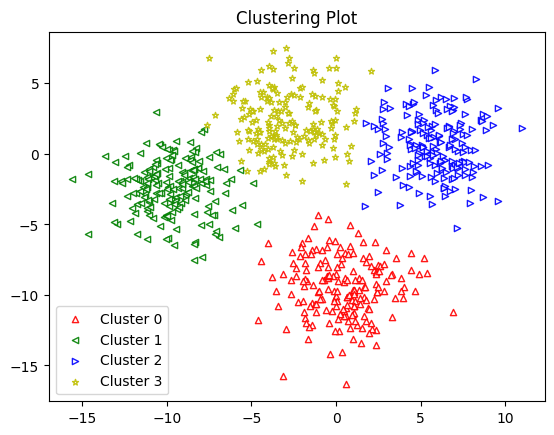

In [279]:
# Get dataframes for each estimated cluster
df1 = df[df.Cluster1==0]
df2 = df[df.Cluster1==1]
df3 = df[df.Cluster1==2]
df4 = df[df.Cluster1==3]

# Scatter plot of each estimated cluster
plt.scatter(df1.x1, df1.x4, label='Cluster 0',      c='white', edgecolor='r', marker='^', s=20, alpha=0.9)
plt.scatter(df2.x1, df2.x4, label='Cluster 1',      c='white', edgecolor='g', marker='<', s=20, alpha=0.9)
plt.scatter(df3.x1, df3.x4, label='Cluster 2',      c='white', edgecolor='b', marker='>', s=20, alpha=0.9)
plt.scatter(df4.x1, df4.x4, label='Cluster 3',      c='white', edgecolor='y', marker='*', s=20, alpha=0.9)


plt.title('Clustering Plot')
plt.legend()

plt.show()

### Questions

Provides a detailed description of your results

Your response: Debido a clustering de dos dimensiones (x1 y x4) que se realizó, podemos encontrar que el algoritmo encontró ciertos agrupamientos al hacer el clustering con dos variables.

## d) Elbow plot

Compute the Elbow plot

In [280]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df[['x1','x4']])
    sse.append(km.inertia_)

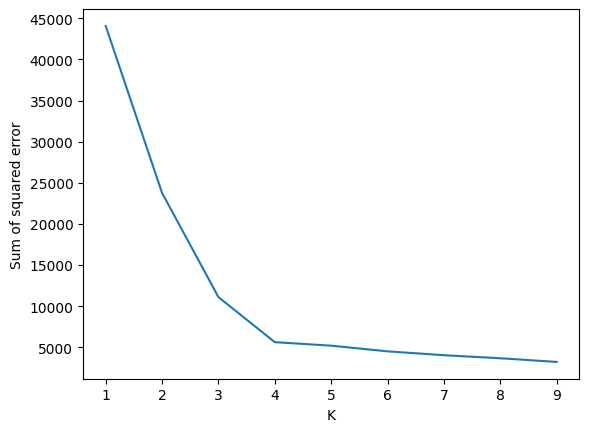

In [281]:
# Plot sse versus k
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response:
4, Por medio del Elbow Plot, podemos encontrar que K=4 es el número ideal de clusters como se había intuido por medio de la visualización de datos. Podemos saberlo por el "codo" que se genera en la gráfica, aquí el error cuadrático se redujo a un punto que ya no disminuye significativamente, por lo que, podemos encontrar un equilibrio para que el modelo no sea más complejo.

Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response:
Sí, al principio había seleccionado un cluster de 4, por lo que, la intución por medio de los scatterplot sí había sido correcta.



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [ ]:
from sklearn.datasets import load_digits

DS = load_digits()

df = pd.DataFrame(DS.data, columns=[f'pixel_{i}' for i in range(64)])
df['target'] = DS.target

In [286]:
df_all = df.iloc[:, :64]      # Usar todas las variables
df_1row = df.iloc[:, :8]      # 8 primeros píxeles (Fila 1)
df_4row = df.iloc[:, 24:32]   # 8 píxeles de la fila 4
df_8row = df.iloc[:, 56:64]   # 8 píxeles de la fila 8

In [283]:
X = DS.data

y = DS.target

# Data as matrix
X = DS.images

# Name of the variables
feature_names = DS.feature_names


# Name of the classes/groups
target_names = DS.target_names

In [ ]:
df.shape

(1797, 65)

2) Plot some of the observations (add in the title the label/digit of that obserbation)

In [ ]:
# Select one of the observations
i = 345

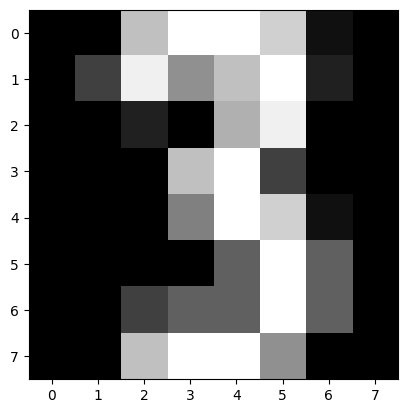

In [ ]:
plt.imshow(X[i].reshape(8,8), cmap='gray')
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [ ]:
print(df.iloc[:,:64].columns)

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')


In [331]:
def apply_kmeans(X, title, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    clusters = kmeans.fit_predict(X)
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(6, 5))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
    
    return clusters

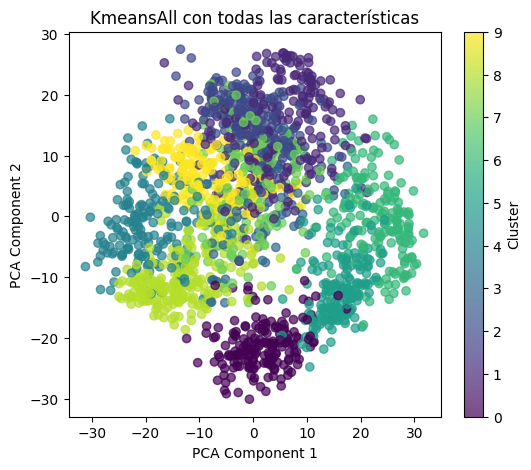

In [332]:
y_pred_all = apply_kmeans(df_all, "KmeansAll con todas las características")


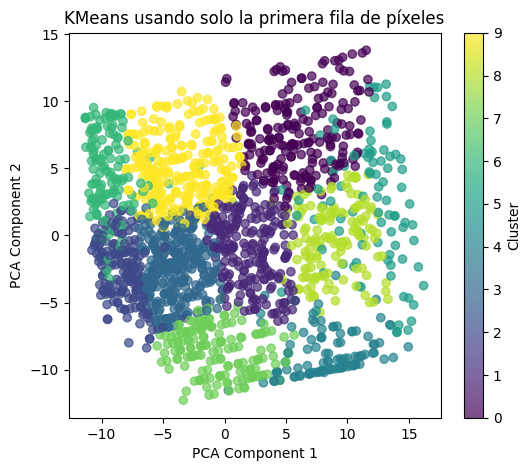

In [333]:
y_pred_1row = apply_kmeans(df_1row, "KMeans usando solo la primera fila de píxeles")

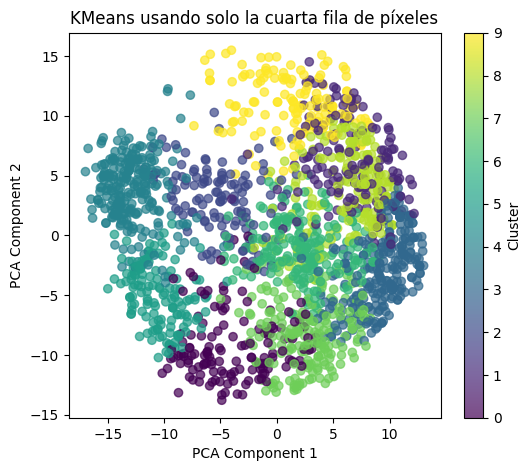

In [334]:
y_pred_4row = apply_kmeans(df_4row, "KMeans usando solo la cuarta fila de píxeles")

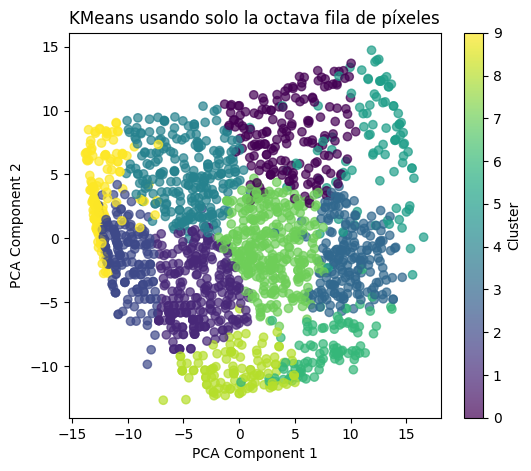

In [335]:
y_pred_8row = apply_kmeans(df_8row, "KMeans usando solo la octava fila de píxeles")

4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

In [321]:
X = DS.data
y = DS.target

In [322]:
kmeans = KMeans(n_clusters=10, random_state=0)
y_pred = kmeans.fit_predict(X)

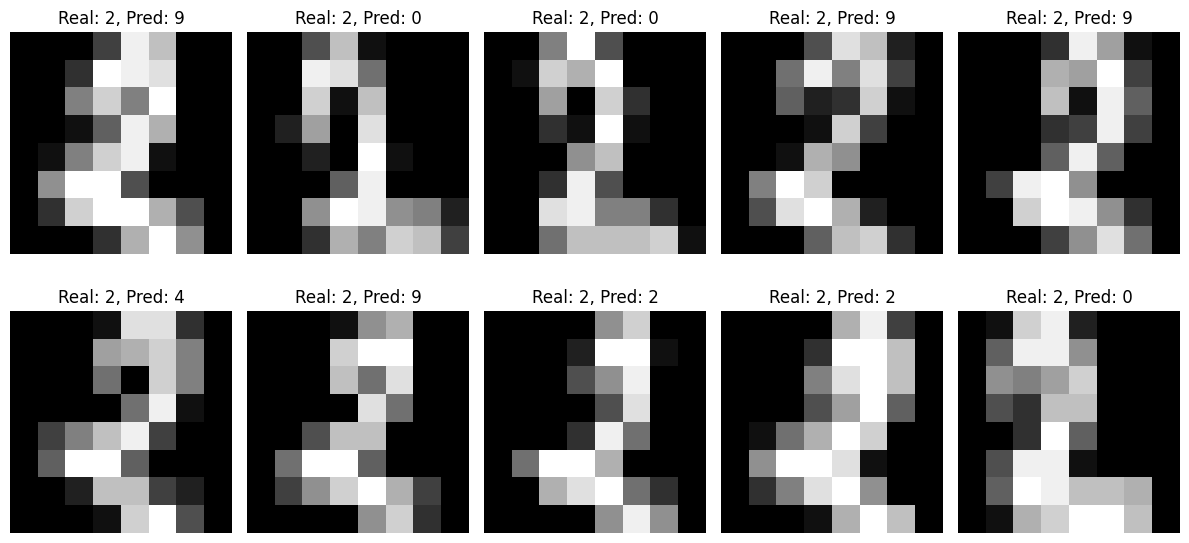

In [325]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
target_digit = 2
indices = [i for i in range(len(y)) if y[i] == target_digit]


for i, ax in enumerate(axes.flatten()):
    if i < len(indices):
        idx = indices[i]
        ax.imshow(DS.images[idx], cmap=plt.cm.gray)
        ax.set_title(f'Real: {y[idx]}, Pred: {y_pred[idx]}')
        ax.axis('off')

plt.tight_layout()
plt.show()

5) Compute the Elbow plot

In [328]:
sse = []

k_rng = range(1,30)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(df.iloc[:,:64])
    sse.append(km.inertia_)

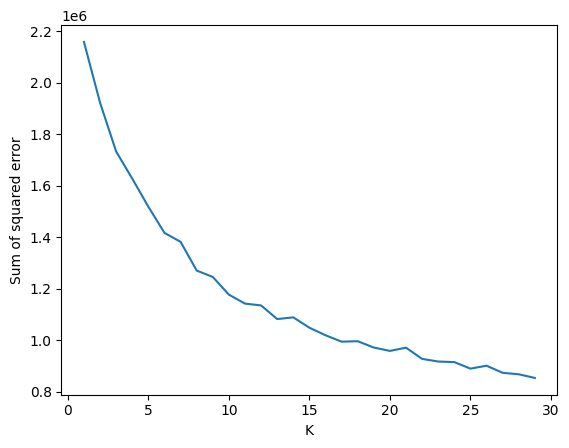

In [329]:
# Plot sse versus k
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
print("Evaluación: ", silhouette_score(X, y_pred_all))
print("Evaluación: ", silhouette_score(X, y_pred_1row))
print("Evaluación: ", silhouette_score(X, y_pred_4row))
print("Evaluación: ", silhouette_score(X, y_pred_8row))


Evaluación:  0.18253573914791615
Evaluación:  0.01713254144049886
Evaluación:  0.045291081747231246
Evaluación:  0.030994523536048365


Este evaluación o métrica entre más alta sea significa que los puntos dentro de un cluster son más similares entre sí y diferentes de los puntos de otros clusters.

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response):

El método de KMeansAll fue más efectivo en el método de clustering y la correspondencia con las etiquetas reales. Este método aprovecha toda la información de los pixeles de la imagen y produce agrupamientos más consistentes, especialmente cuando las características los dígitos se distribuyen a lo largo de toda la imagen.

Los demás métodos puede que ayuden a ser computacionalmente más eficientes y rápidos, sin embargo, pierden información y al momento de hacer un cluster para ciertos números puede no ser tan eficiente.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [354]:
from sklearn.datasets import load_digits

# Load the dataset
DS = load_digits()

df = pd.DataFrame(DS.data, columns=DS.feature_names)
df['target'] = DS.target
df



,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


2) Plot some of the observations  (add in the title the label/digit of that obserbation)

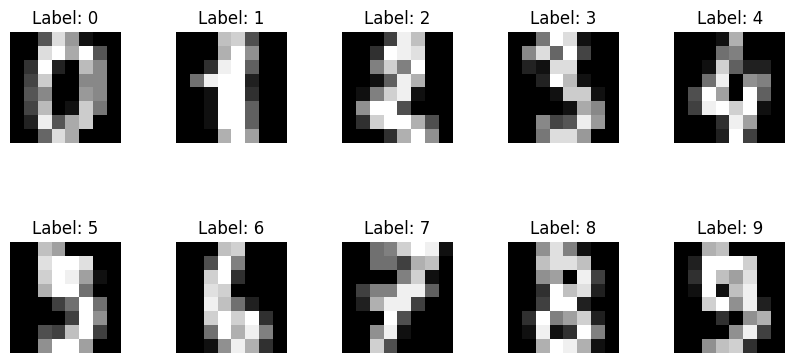

In [355]:
# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))  # Crear una cuadrícula de 2 filas por 5 columnas
axes = axes.ravel()  # Aplanar la matriz de ejes para facilitar el acceso

for i in range(10):  # Mostrar las primeras 10 imágenes
    axes[i].imshow(DS.images[i], cmap='gray')  # Mostrar la imagen
    axes[i].set_title(f"Label: {DS.target[i]}")  # Agregar título con la etiqueta de la imagen
    axes[i].axis('off')  # Desactivar los ejes para una visualización más limpia

plt.subplots_adjust(wspace=0.5)  # Ajustar el espacio entre subgráficos
plt.show()


3) Split the dataset in train and test

In [380]:
X = df.drop('target', axis = 1)
X


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [381]:
y = df['target']
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [ ]:
def train_classifier(X_train, y_train, feature_columns):
    X_train_selected = X_train.iloc[:, feature_columns]
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train_selected, y_train)
    return clf

5) Make predictions (use the test set)

In [384]:
def make_predictions(clf, X_test, feature_columns):
    X_test_selected = X_test.iloc[:, feature_columns]
    y_pred = clf.predict(X_test_selected)
    return y_pred

6) Compute performance metrics

In [385]:
def analyze_metrics(y_test, y_pred, clf_name):
    print(f"\n{clf_name} performance:")
    print(classification_report(y_test, y_pred))

In [386]:
# Clasificador completo (todas las características)
clf_all = train_classifier(X_train, y_train, range(64))
y_pred_all = make_predictions(clf_all, X_test, range(64))
analyze_metrics(y_test, y_pred_all, "ClassifierAll")


ClassifierAll performance:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.96      0.98      0.97        52
           2       0.98      0.94      0.96        53
           3       0.95      0.96      0.95        54
           4       1.00      0.98      0.99        48
           5       0.96      0.95      0.96        57
           6       0.98      1.00      0.99        60
           7       0.98      1.00      0.99        53
           8       0.98      0.95      0.97        61
           9       0.97      0.98      0.97        57

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [387]:
# Clasificador de la primera columna (primeras 8 características)
clf_1col = train_classifier(X_train, y_train, range(8))
y_pred_1col = make_predictions(clf_1col, X_test, range(8))
analyze_metrics(y_test, y_pred_1col, "Classifier1col")


Classifier1col performance:
              precision    recall  f1-score   support

           0       0.23      0.31      0.27        45
           1       0.38      0.42      0.40        52
           2       0.45      0.49      0.47        53
           3       0.20      0.17      0.18        54
           4       0.55      0.62      0.58        48
           5       0.55      0.39      0.45        57
           6       0.47      0.47      0.47        60
           7       0.37      0.47      0.41        53
           8       0.20      0.15      0.17        61
           9       0.36      0.32      0.34        57

    accuracy                           0.38       540
   macro avg       0.37      0.38      0.37       540
weighted avg       0.37      0.38      0.37       540



In [388]:
# Clasificador de la cuarta columna (características 24-31)
clf_4col = train_classifier(X_train, y_train, range(24, 32))
y_pred_4col = make_predictions(clf_4col, X_test, range(24, 32))
analyze_metrics(y_test, y_pred_4col, "Classifier4col")


Classifier4col performance:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        45
           1       0.55      0.46      0.50        52
           2       0.58      0.58      0.58        53
           3       0.52      0.61      0.56        54
           4       0.71      0.83      0.77        48
           5       0.51      0.54      0.53        57
           6       0.81      0.73      0.77        60
           7       0.65      0.70      0.67        53
           8       0.57      0.48      0.52        61
           9       0.64      0.61      0.62        57

    accuracy                           0.64       540
   macro avg       0.65      0.65      0.65       540
weighted avg       0.64      0.64      0.64       540



In [389]:
# Clasificador de la octava columna (características 56-63)
clf_8col = train_classifier(X_train, y_train, range(56, 64))
y_pred_8col = make_predictions(clf_8col, X_test, range(56, 64))
analyze_metrics(y_test, y_pred_8col, "Classifier8col")


Classifier8col performance:
              precision    recall  f1-score   support

           0       0.36      0.62      0.46        45
           1       0.42      0.40      0.41        52
           2       0.65      0.57      0.61        53
           3       0.23      0.22      0.22        54
           4       0.65      0.69      0.67        48
           5       0.43      0.37      0.40        57
           6       0.55      0.80      0.65        60
           7       0.67      0.74      0.70        53
           8       0.29      0.11      0.16        61
           9       0.32      0.25      0.28        57

    accuracy                           0.47       540
   macro avg       0.46      0.48      0.46       540
weighted avg       0.45      0.47      0.45       540



7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

In [411]:
def plot_observations(X_test, y_test, y_pred, digit_label, num_plots=15):
    plt.figure(figsize=(12, 6))  # Asegúrate de que la figura tenga suficiente espacio
    count = 0
    for i in range(len(y_test)):
        if y_test.iloc[i] == digit_label:
            plt.subplot(3, 5, count + 1)  # Cambié a 2 filas y 5 columnas
            plt.imshow(X_test.iloc[i].to_numpy().reshape(8, 8), cmap=plt.cm.gray_r)
            plt.title(f"True: {y_test.iloc[i]}, Pred: {y_pred[i]}")
            plt.axis('off')
            count += 1
        if count >= num_plots:
            break
    plt.tight_layout()  # Ajusta la disposición de las subgráficas
    plt.show()

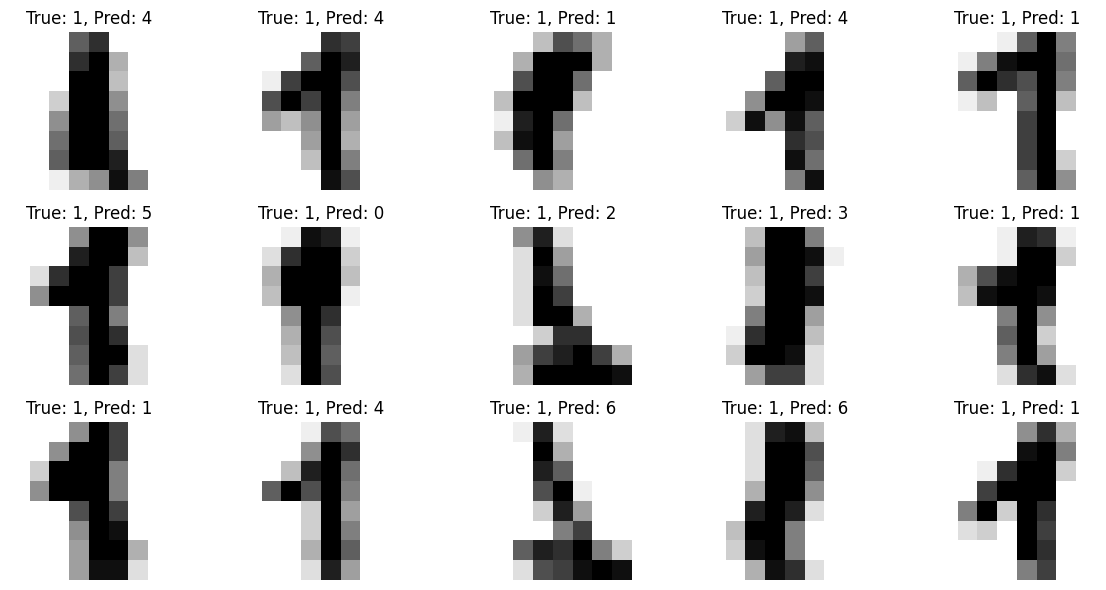

In [417]:
plot_observations(X_test, y_test, y_pred_1col, digit_label=1)

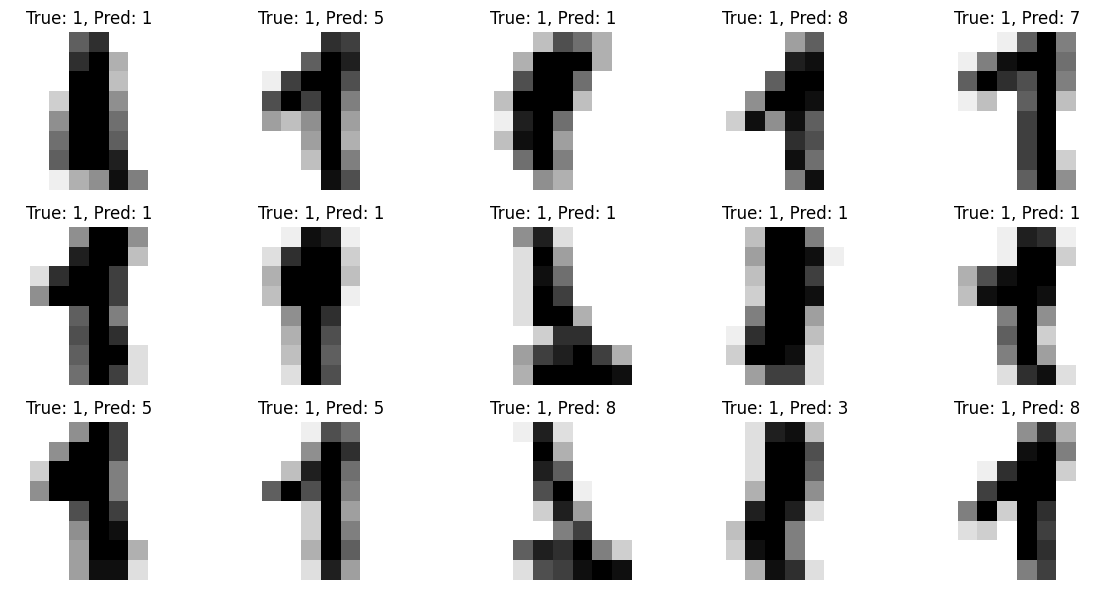

In [416]:
plot_observations(X_test, y_test, y_pred_4col, digit_label=1)

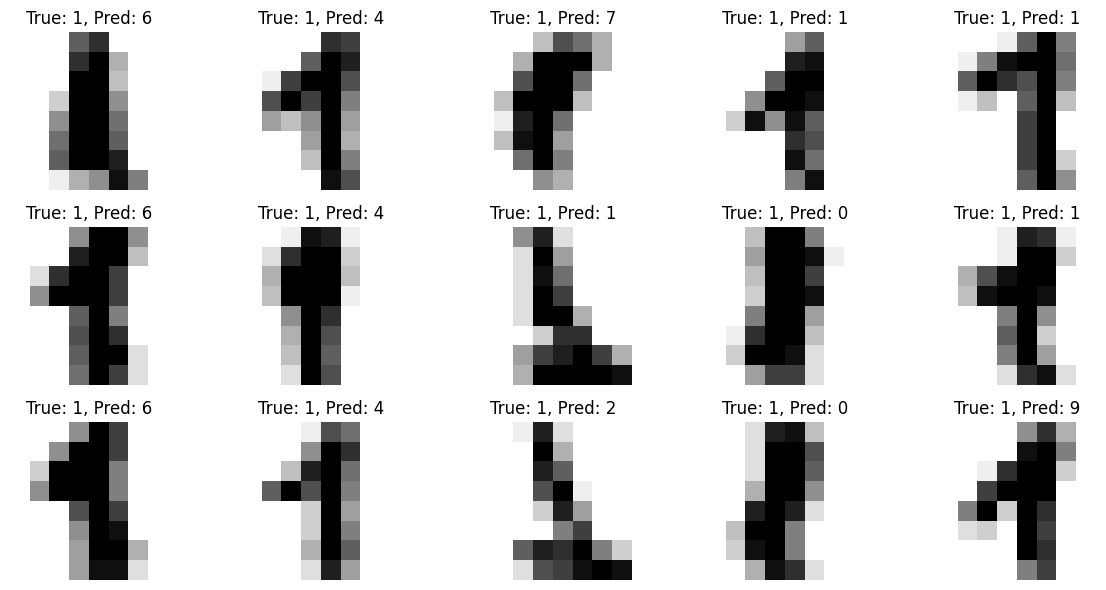

In [418]:
plot_observations(X_test, y_test, y_pred_8col, digit_label=1)

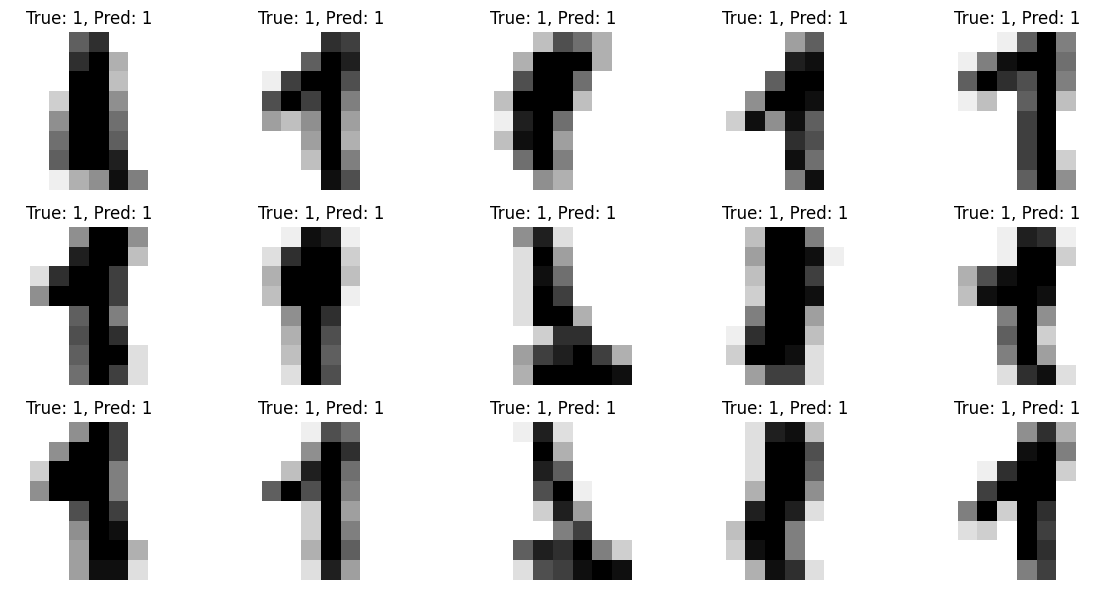

In [419]:
plot_observations(X_test, y_test, y_pred_all, digit_label=1)

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response):

De nuevo, el utilizar todos los píxeles de la base de datos es más eficiente, por lo que es el que tiene mejor precisión.

Al utilizar los demás (1,4,8 rows) se pierde la información por lo que no hace un buen resultado a pesar de utlizar un modelo de clasificación de "ensamble" lo que es muy potente.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:

Considero que soy capaz de identificar y comprender las interacciones entre las variables, analicé cómo estas variables se relacionan entre sí dentro del contexto del fenómeno que se analizaron. Logré utilizar herramientas y métodos adecuados para interpretar estas interacciones y construir modelos bivariados que representan cómo se comportan las variables entre sí.

Además de hacer la validación del modelo con base en los datos obtenidos. Esto me permite integrar el análisis de datos y la creación de modelos que reflejan de forma clara las relaciones entre las variables.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:

He demostrado la capacidad de construir modelos bivariados que explican el comportamiento de los fenómenos. Logré seleccionar de manera correcta las variables relevantes y aplicar los métodos adecuados para establecer la relación entre ellas. Utilicé herramientas técnicas para hacer modelado para desarrollar un modelo que reflejó con cierta precisión cómo una variable afecta a la otra.
Además, he sido capaz de interpretar los resultados del modelo, ajustarlo según los datos disponibles y validarlo, asegurando que efectivamente explique el fenómeno estudiado.